In [34]:
import pandas as pd
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv("XGBClassifier_predictions.csv")

In [61]:
def plot_roc_curves(df, column_name, label_col="labels", pred_col="predictions", value_names={}):
  """
  Plots ROC curves for different groups based on a specified column.

  Args:
    df: pandas DataFrame containing data.
    column_name: Column name representing groups (e.g., "gender", "ethnicity").
    label_col: Column name containing true labels (default: "labels").
    pred_col: Column name containing predicted labels (default: "predictions").
    value_names: Dictionary mapping column values to custom labels (default: None).

  Returns:
    None. Plots the ROC curves to the current figure.
  """
  unique_values = sorted(df[column_name].unique())

  plt.figure(figsize=(10, 6))
  for i, value in enumerate(unique_values):
    group_data = df[df[column_name] == value]
    y_true = group_data[label_col]
    y_pred = group_data[pred_col]
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    label = value_names.get(value, value)  # Use custom label if available
    plt.plot(fpr, tpr, label=label)

  # Add subtle y=x line
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.5)

  # Customize plot and display
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(f"ROC Curves by {column_name}")
  plt.legend(title=column_name)
  plt.grid(True)
  plt.show()

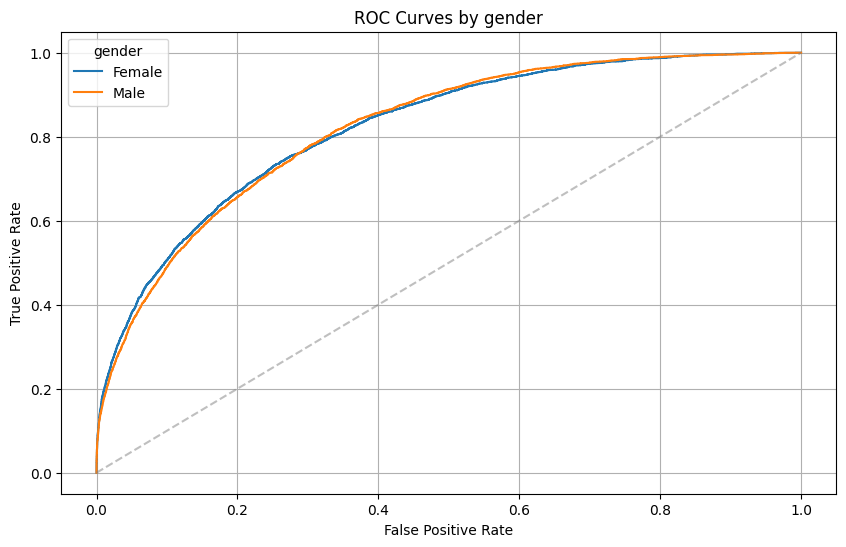

In [62]:
gender_labels = {
  'F': 'Female',
  'M': 'Male'
}

data_gender_drop_na = pd.DataFrame(data)
data_gender_drop_na.dropna(inplace=True)
plot_roc_curves(data_gender_drop_na, 'gender', value_names=gender_labels)

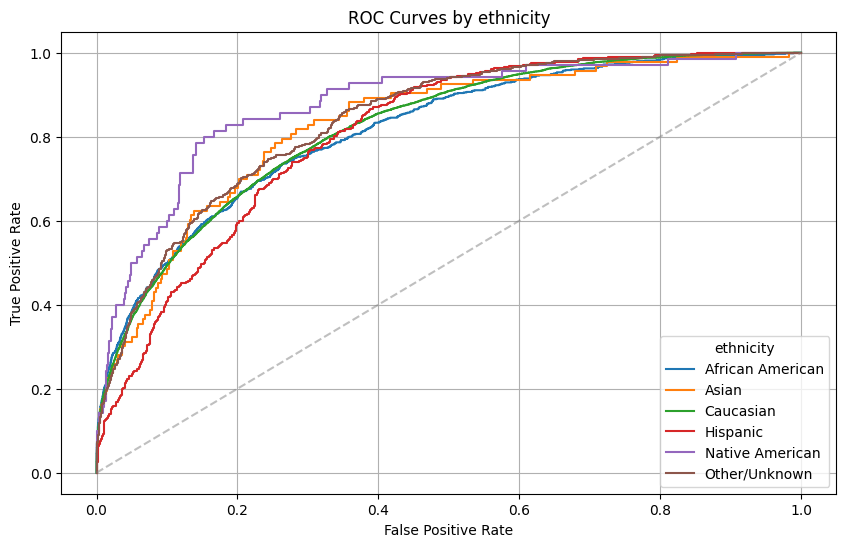

In [63]:
plot_roc_curves(data, 'ethnicity')

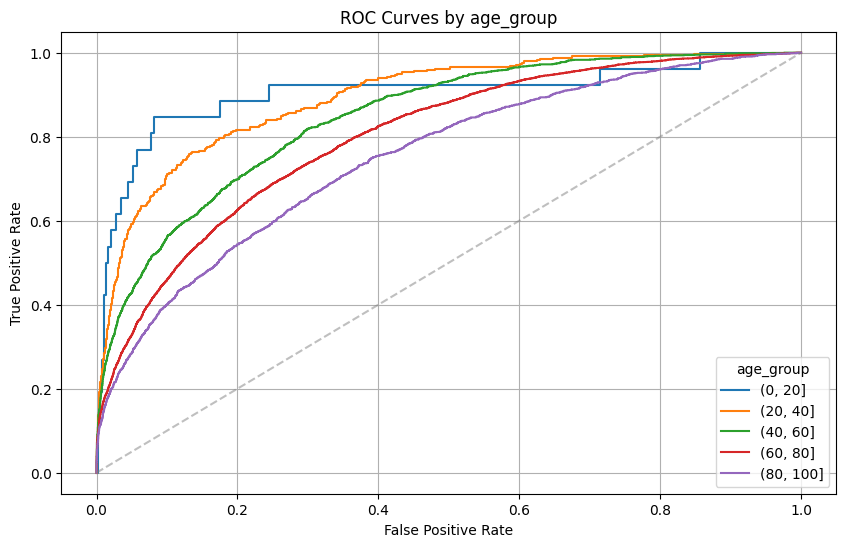

In [64]:
# Define age groups with 20-year steps
age_groups = range(0, 101, 20)
age_groups_labels = [pd.Interval(left=b, right=b+20) for b in range(0, 101, 20)]

# Use pd.cut to create the age group column based on boundaries and labels
data_with_age_groups = data.copy()

# data_with_age_groups['age_group'] = pd.cut(data_with_age_groups['age'], age_groups, labels=age_groups[:-1])
data_with_age_groups['age_group'] = pd.cut(data_with_age_groups['age'], age_groups, labels=age_groups_labels[:-1])
data_with_age_groups.dropna(inplace=True)

plot_roc_curves(data_with_age_groups, 'age_group')

# # Loop through each age group and create a new temporary dataframe
# for group in age_groups.unique():
#   group_data = data[age_groups == group]
#   # Pass this temporary dataframe to plot_roc_curves
#   plot_roc_curves(group_data, column_name="age", value_names={group: str(group.left) + "-" + str(group.right) + " years old"})

In [65]:
data_with_age_groups.to_csv('XGBClassifier_predictions_with_age_groups.csv')

In [67]:
import pandas as pd

# Sample data (replace with your actual data)
# data = {
#     "age_group": ["Young", "Young", "Adult", "Adult", "Senior", "Senior"],
#     "gender": ["Male", "Female", "Male", "Female", "Male", "Female"],
#     "ethnicity": ["White", "White", "Black", "Black", "Hispanic", "Hispanic"],
#     "predictions": [0.7, 0.2, 0.8, 0.3, 0.9, 0.1],
#     "labels": [1, 0, 1, 0, 1, 0]
# }

df = pd.DataFrame(data_with_age_groups)


def calculate_odds_ratio(subgroup_df):
    """Calculates the odds ratio for a given subgroup using your formula.

    Args:
        subgroup_df (pd.DataFrame): A DataFrame containing data for a specific subgroup.

    Returns:
        float: The odds ratio for the subgroup using your formula.
    """

    avg_prediction = subgroup_df["predictions"].mean()
    avg_outcome = subgroup_df["labels"].mean()

    if avg_prediction == 0 or avg_prediction == 1 or avg_outcome == 0 or avg_outcome == 1:
        # Handle cases where division by zero would occur
        return None

    # Calculate odds ratio using your formula (not recommended for calibration)
    odds_ratio = (avg_prediction / (1 - avg_prediction)) / (avg_outcome / (1 - avg_outcome))

    return odds_ratio


# Calculate odds ratio for each subgroup
subgroups = df.groupby(["age_group", "gender", "ethnicity"])
odds_ratios = subgroups.apply(calculate_odds_ratio)

# Print the results
print(odds_ratios.to_string(index=True))


age_group  gender  ethnicity       
(0, 20]    F       African American         NaN
                   Asian                    NaN
                   Caucasian           1.896853
                   Hispanic            1.126136
                   Native American          NaN
                   Other/Unknown            NaN
           M       African American    2.306798
                   Asian                    NaN
                   Caucasian           0.804440
                   Hispanic                 NaN
                   Native American     0.055796
                   Other/Unknown       2.191599
(20, 40]   F       African American    1.195446
                   Asian               1.471725
                   Caucasian           1.533074
                   Hispanic            1.077237
                   Native American     2.314853
                   Other/Unknown       0.926619
           M       African American    1.144392
                   Asian                    NaN
    

/var/folders/m7/g2p4ht5n18x83ks3g6mbtjg40000gn/T/ipykernel_57696/3716733276.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  subgroups = df.groupby(["age_group", "gender", "ethnicity"])
